In [9]:
# Cargamos el el archivo csv generado en el paso anterior con el objetivo de estandarizar los modelos de los autos

import pandas as pd
from fuzzywuzzy import fuzz

vehicles_df = pd.read_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//vehicles_clean2.csv',quotechar='"')
dictionary_df = pd.read_csv('c://users//Sergi///diccionario_modelos.csv')


In [10]:
# Eliminar guiones en ambas columnas 'model'
vehicles_df['model'] = vehicles_df['model'].str.replace('-', '')
dictionary_df['model'] = dictionary_df['model'].str.replace('-', '')

In [11]:
# Convertir las columnas a minúsculas
vehicles_df['model'] = vehicles_df['model'].str.lower()
dictionary_df['model'] = dictionary_df['model'].str.lower()

In [12]:
# Establecer umbral de coincidencia
umbral_coincidencia = 0.8 

In [13]:
# Agrupar por similitud y actualizar el modelo de auto
def find_best_match(row):
    model_actual = row['model']
    manufacturer_actual = row['manufacturer']
    
    max_similarity = 0
    best_match = None

    for modelo_dict, manufacturer_dict in zip(dictionary_df['model'], dictionary_df['manufacturer']):
        similitud = fuzz.token_set_ratio(model_actual, modelo_dict)
        if similitud >= umbral_coincidencia and manufacturer_actual == manufacturer_dict:
            if similitud > max_similarity:
                max_similarity = similitud
                best_match = modelo_dict

    return best_match

vehicles_df['best_match'] = vehicles_df.apply(find_best_match, axis=1)


In [14]:
# Actualizar modelos en el DataFrame original
vehicles_df['model'] = vehicles_df['best_match'].combine_first(vehicles_df['model'])

# Eliminar la columna 'best_match' si es necesario
vehicles_df.drop(columns=['best_match'], inplace=True)

In [15]:
# Guardar el DataFrame procesado si es necesario
vehicles_df.to_csv('c://users//Sergi//vehicles_with_model_clean.csv', index=False)

In [16]:
# Factorizar columnas no numericas

columnas_nn = ('manufacturer', 'model', 'fuel', 'transmission', 'drive', 'size', 'type','state')

# Crear un nuevo DataFrame para las columnas factorizadas
vehicles_df_fact = vehicles_df.copy()

for col in columnas_nn:
    vehicles_df_fact[col] = pd.factorize(vehicles_df_fact[col])[0]

vehicles_df_fact

,price,year,manufacturer,model,fuel,odometer,transmission,drive,size,type,state,lat,long
0,22590,2010.0,0,0,0,71229.0,0,0,0,0,0,32.590000,-85.480000
1,30990,2017.0,1,1,0,41124.0,0,0,0,0,0,32.590000,-85.480000
2,15000,2013.0,2,2,0,128000.0,1,1,0,1,0,32.592000,-85.518900
3,35000,2019.0,1,3,0,43000.0,1,0,1,1,0,32.601300,-85.443974
4,29990,2016.0,0,4,0,17302.0,0,0,1,0,0,32.590000,-85.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293244,29590,2016.0,1,154,0,53475.0,1,0,0,3,50,33.786500,-84.445400
293245,0,2010.0,1,149,0,155000.0,1,0,1,11,50,40.114685,-104.971971
293246,32590,2020.0,11,429,0,19059.0,0,1,2,6,50,33.779214,-84.411811
293247,33590,2018.0,18,1535,0,30814.0,1,1,1,6,50,33.779214,-84.411811


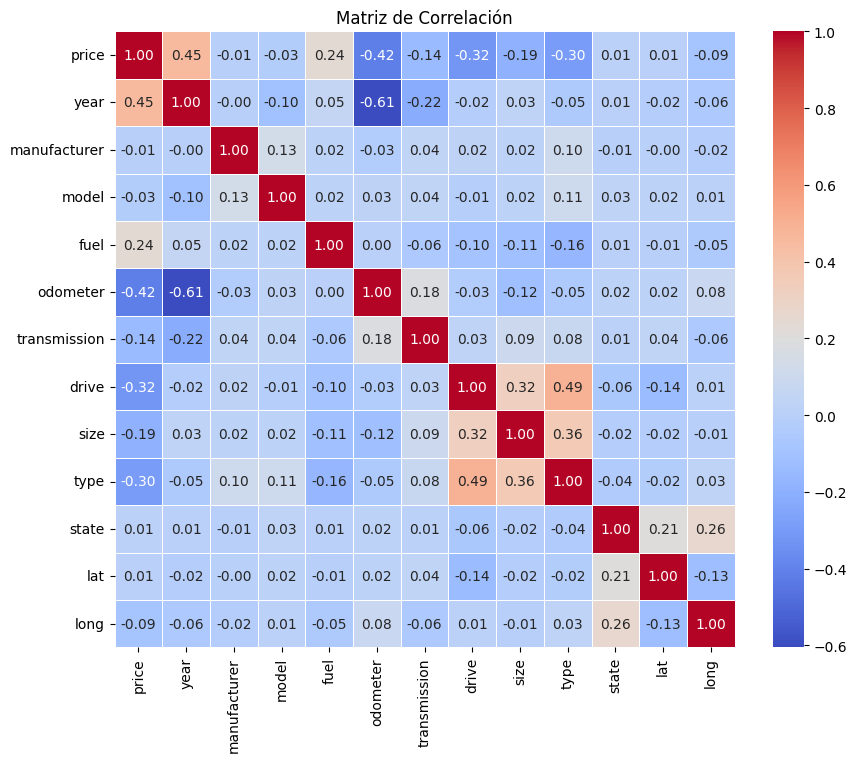

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = vehicles_df_fact.corr()

# Crear y visualizar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

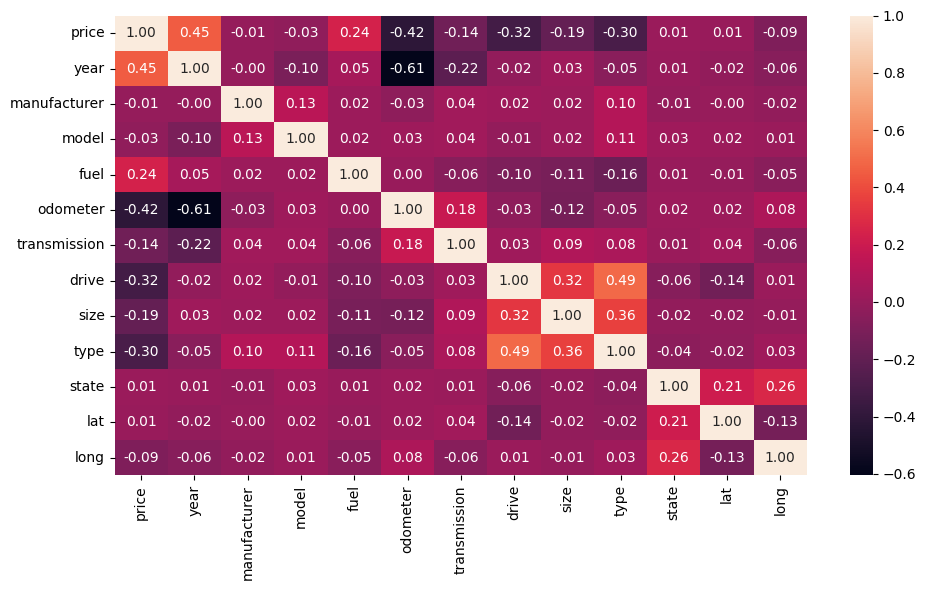

In [18]:
# Calcular Heatmap

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(vehicles_df_fact.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [19]:
# Vehicle_clean_fact contine la informacion con el dataframe que se obtiene al estandarizas los modelos de autos factorizado
vehicles_df_fact.to_csv("C:\\Users\\sergi\\Proyectos\\Proyecto_Final\\data\\processed\\vehicles_clean_fact.csv", index=False)